## P-156- Book Recommendation

# Business Objective:
### Generate the features from the dataset and use them to recommend the books accordingly to the users.


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

#  Reading Dataset

In [2]:
books=pd.read_csv("C:\\Users\\adite\\Downloads\\Dataset1\\Books.csv")
ratings=pd.read_csv("C:\\Users\\adite\\Downloads\\Dataset1\\Ratings.csv")
users=pd.read_csv("C:\\Users\\adite\\Downloads\\Dataset1\\Users.csv")

#  Data Understanding

### book dataset

In [3]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
print("Length of book dataset is : " ,len(books))
print(50*"_")
print("\nShape of book data set is : ", books.shape)
print(50*"_")
print("\nColumns of book dataset is : \n\n",books.columns)

Length of book dataset is :  271360
__________________________________________________

Shape of book data set is :  (271360, 8)
__________________________________________________

Columns of book dataset is : 

 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [5]:
print("Checking Null values :\n",books.isna().sum())

Checking Null values :
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**Info functions shows information about dataset. Here we have Total number of records and attributes also there is a list of attributes abd their respective datatypes.**
**Here "Year-Of-Publication" column must be int but it is showing object.**

In [7]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242131,102023,202,16806,271044,271044,271041
top,195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


**describe function shows the counts and unique counts in datasets.**

In [8]:
books[books.duplicated()]    # Checking duplicates

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


### ratings dataset

In [9]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [10]:
print("Length of ratings dataset is : " ,len(ratings))
print(50*"_")
print("\nShape of ratings data set is : ", ratings.shape)
print(50*"_")
print("\nColumns of ratings dataset is : \n\n",ratings.columns)

Length of ratings dataset is :  1149780
__________________________________________________

Shape of ratings data set is :  (1149780, 3)
__________________________________________________

Columns of ratings dataset is : 

 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [11]:
print("Checking Null values :\n",ratings.isna().sum())

Checking Null values :
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
ratings[ratings.duplicated()]     # Checking duplicates

,User-ID,ISBN,Book-Rating


### users dataset

In [14]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [15]:
print("Length of users dataset is : " ,len(users))
print(50*"_")
print("\nShape of users data set is : ", users.shape)
print(50*"_")
print("\nColumns of users dataset is : \n\n",users.columns)

Length of users dataset is :  278858
__________________________________________________

Shape of users data set is :  (278858, 3)
__________________________________________________

Columns of users dataset is : 

 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [16]:
print("Checking Null values :\n",users.isna().sum())

Checking Null values :
 User-ID          0
Location         0
Age         110762
dtype: int64


In [17]:
(110762/278858)*100

39.71985741847105

**Here is , In Age column count of null value is 110762.Which is appro. 40 % of dataset.**

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [19]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


**Here we can see that maximum value of Age is 244 and minimum value is 0, which are invalid.**

In [20]:
users[users.duplicated()]     # Checking duplicates

,User-ID,Location,Age


# Data Preprocessing

### book dataset

In [21]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [22]:
list((books["ISBN"].unique()))

['195153448',
 '2005018',
 '60973129',
 '374157065',
 '393045218',
 '399135782',
 '425176428',
 '671870432',
 '679425608',
 '074322678X',
 '771074670',
 '080652121X',
 '887841740',
 '1552041778',
 '1558746218',
 '1567407781',
 '1575663937',
 '1881320189',
 '440234743',
 '452264464',
 '609804618',
 '1841721522',
 '1879384493',
 '61076031',
 '439095026',
 '689821166',
 '971880107',
 '345402871',
 '345417623',
 '684823802',
 '375759778',
 '425163091',
 '3404921038',
 '3442353866',
 '3442410665',
 '3442446937',
 '375406328',
 '446310786',
 '449005615',
 '60168013',
 '038078243X',
 '055321215X',
 '067176537X',
 '61099686',
 '553582909',
 '671888587',
 '553582747',
 '425182908',
 '042518630X',
 '440223571',
 '812523873',
 '842342702',
 '440225701',
 '60914068',
 '156047624',
 '245542957',
 '380715899',
 '553280333',
 '961769947',
 '964778319',
 '671623249',
 '679810307',
 '679865691',
 '2070423204',
 '345260317',
 '394743741',
 '042511774X',
 '804106304',
 '1853262404',
 '312970242',
 '18532

In [23]:
books["ISBN"][6635]  # Here is the value of index no. 6635

'002542730x'

In [24]:
books[books["ISBN"]=="002542730X"]   # This this the same value except capital x and small x. both numbers are actually same

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3739,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [25]:
books['ISBN'] = books['ISBN'].str.upper()  # Here we have changed strings in upper case

In [26]:
books.drop_duplicates(keep='last', inplace=True)  #We have droped duplicates and reset index
books.reset_index(drop = True, inplace = True)

In [27]:
print("\nUnique books : ",len(books["Book-Title"].unique()))
list(books["Book-Title"].unique())


Unique books :  242131


['Classical Mythology',
 'Clara Callan',
 'Decision in Normandy',
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
 'The Mummies of Urumchi',
 "The Kitchen God's Wife",
 "What If?: The World's Foremost Military Historians Imagine What Might Have Been",
 'PLEADING GUILTY',
 'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
 "Where You'll Find Me: And Other Stories",
 'Nights Below Station Street',
 "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust",
 'The Middle Stories',
 'Jane Doe',
 "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
 'The Witchfinder (Amos Walker Mystery Series)',
 'More Cunning Than Man: A Social History of Rats and Man',
 'Goodbye to the Buttermilk Sky',
 'The Testament',
 'Beloved (Plume Contemporary Fiction)',
 "Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source",
 'New Vegetarian: Bo

In [28]:
len(books["Publisher"].unique())

16807

In [29]:
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Here in "Year-Of-Publication"  column, we can see that There is entry named "0" which is invalid and future years are there that are greater than 2022. also texts are there in that column "DK Publishing Inc" and "Gallimard" which we have to replace.**

In [30]:
pd.set_option('display.max_colwidth', None)
books[books["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209350,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221487,789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [31]:
books[books["Year-Of-Publication"]=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220540,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [32]:
def replace_correct_value(df,idx,column,val):
    df.loc[idx,column] = val
    return df

In [33]:
replace_correct_value(books,209350,"Book-Title","DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers")
replace_correct_value(books,209350,"Book-Author","Michael Teitelbaum")
replace_correct_value(books,209350,"Year-Of-Publication",2000)
replace_correct_value(books,209350,"Publisher","DK Publishing Inc")


replace_correct_value(books,221487,"Book-Title","DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers")
replace_correct_value(books,221487,"Book-Author","James Buckley")
replace_correct_value(books,221487,"Year-Of-Publication",2000)
replace_correct_value(books,221487,"Publisher","DK Publishing Inc")


replace_correct_value(books,220540,"Book-Title","Peuple du ciel, suivi de 'Les Bergers")
replace_correct_value(books,220540,"Book-Author","Jean-Marie Gustave Le ClÃ?Â©zio")
replace_correct_value(books,220540,"Year-Of-Publication",2003)
replace_correct_value(books,220540,"Publisher","Gallimard")

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271161,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271162,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271163,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271164,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [34]:
books[books["Year-Of-Publication"]=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [35]:
books[books["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [36]:
books[books["Year-Of-Publication"]==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
175,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.LZZZZZZZ.jpg
187,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.LZZZZZZZ.jpg
287,571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.LZZZZZZZ.jpg
349,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.LZZZZZZZ.jpg
537,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
270600,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.LZZZZZZZ.jpg
270719,340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.LZZZZZZZ.jpg
270900,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.LZZZZZZZ.jpg
270988,887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.LZZZZZZZ.jpg


**To replace "0" we use mode here.**

In [37]:
mode=books["Year-Of-Publication"].mode()
mode

0    2002
Name: Year-Of-Publication, dtype: object

In [38]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].replace([0],2002)

In [39]:
books[books["Year-Of-Publication"]==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [40]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].astype(int)
books[books["Year-Of-Publication"]>2022]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37379,671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS),Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671746103.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671746103.01.LZZZZZZZ.jpg
55539,671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS),Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671791990.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671791990.01.LZZZZZZZ.jpg
78014,870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0870449842.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0870449842.01.LZZZZZZZ.jpg
80109,140301690,Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books),Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140301690.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140301690.01.LZZZZZZZ.jpg
97660,140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140201092.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140201092.01.LZZZZZZZ.jpg
115884,394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0394701658.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0394701658.01.LZZZZZZZ.jpg
118122,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442436893.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442436893.01.LZZZZZZZ.jpg
192807,870446924,"Field Guide to the Birds of North America, 3rd Ed.",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0870446924.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0870446924.01.LZZZZZZZ.jpg
227982,671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.LZZZZZZZ.jpg
239975,684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.LZZZZZZZ.jpg


In [41]:
books.loc[books['Year-Of-Publication'] > 2022, 'Year-Of-Publication'] = 2002
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021,    0, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

In [42]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].replace([0],2002)
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

### Replacing na values from "Book-Author" column by "Others"

In [43]:
books["Book-Author"]=books[["Book-Author"]].fillna("Others")
books.loc[books["Book-Author"].isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [44]:
books.loc[books["Publisher"].isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128715,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
128862,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


### Replacing na values from "Publisher" column by "Others"

In [45]:
books["Publisher"]=books[["Publisher"]].fillna("Others")
books.loc[books["Publisher"].isna(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [46]:
books=books.drop(["Image-URL-S","Image-URL-L"],axis=1)

In [47]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271166 entries, 0 to 271165
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271166 non-null  object
 1   Book-Title           271166 non-null  object
 2   Book-Author          271166 non-null  object
 3   Year-Of-Publication  271166 non-null  int32 
 4   Publisher            271166 non-null  object
 5   Image-URL-M          271166 non-null  object
dtypes: int32(1), object(5)
memory usage: 11.4+ MB


### ratings dataset

In [48]:
print(len(ratings))
ratings.head(2)

1149780


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [49]:
len(ratings["User-ID"].unique())

105283

In [50]:
list(ratings["User-ID"].unique())

[276725,
 276726,
 276727,
 276729,
 276733,
 276736,
 276737,
 276744,
 276745,
 276746,
 276747,
 276748,
 276751,
 276754,
 276755,
 276760,
 276762,
 276765,
 276768,
 276772,
 276774,
 276780,
 276786,
 276788,
 276796,
 276798,
 276800,
 276803,
 276804,
 276806,
 276808,
 276811,
 276812,
 276813,
 276814,
 276817,
 276820,
 276822,
 276827,
 276828,
 276830,
 276832,
 276833,
 276835,
 276837,
 276838,
 276840,
 276842,
 276847,
 276848,
 276850,
 276852,
 276853,
 276854,
 276856,
 276857,
 276859,
 276861,
 276862,
 276863,
 276866,
 276869,
 276870,
 276872,
 276873,
 276875,
 276878,
 276879,
 276884,
 276887,
 276888,
 276889,
 276890,
 276896,
 276904,
 276905,
 276911,
 276912,
 276915,
 276916,
 276925,
 276927,
 276928,
 276929,
 276934,
 276936,
 276939,
 276943,
 276946,
 276949,
 276950,
 276953,
 276954,
 276957,
 276959,
 276963,
 276964,
 276965,
 276975,
 276981,
 276984,
 276986,
 276988,
 276989,
 276990,
 276992,
 276994,
 276997,
 276998,
 277002,
 277007,
 

In [51]:
len(ratings["ISBN"].unique())

340556

In [52]:
ratings['ISBN'] = ratings['ISBN'].str.upper()
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [53]:
ratings["Book-Rating"].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

### users dataset

In [54]:

print(len(users))
users.head(2)

278858


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [55]:
len(users["User-ID"].unique())

278858

**All values in "User-ID" columns are uniques as lenght of users column is same as length of unique value.**

**As we saw above that , In Age column count of null value is 110762.Which is appro. 40 % of dataset. Also we saw that maximum and minimum values of Age column are invalid**

In [56]:
print("Maximum value in Age column is : ",users.Age.max())
print("_"*50)
print("\nMinimum value in Age column is : ",users.Age.min())
print("_"*50)
print("\nSum of null values is : ",users.Age.isna().sum())

Maximum value in Age column is :  244.0
__________________________________________________

Minimum value in Age column is :  0.0
__________________________________________________

Sum of null values is :  110762


In [57]:
age_less_than90 = users[users['Age'] <= 90]
age_df = age_less_than90[age_less_than90['Age'] >= 15]

In [58]:
print(age_df.shape)
age_df.head(2)

(163353, 3)


,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0


In [59]:
mean=np.round(age_df.Age.mean(),0)
mean

35.0

**Here mean of the Age ( greater than 15 years and less than 90 years ) is 35.**
**We are going to replace it with nan values.**

In [60]:
users.loc[users['Age'] > 90, 'Age'] = mean    
users.loc[users['Age'] < 15, 'Age'] = mean    
users['Age'] = users['Age'].fillna(mean)      

In [61]:
users['Age'] = users['Age'].astype(int)   #Making data type of Age integer

In [62]:
print("Maximum value in Age column is : ",users.Age.max())
print("_"*50)
print("\nMinimum value in Age column is : ",users.Age.min())
print("_"*50)
print("\nSum of null values is : ",users.Age.isna().sum())

Maximum value in Age column is :  90
__________________________________________________

Minimum value in Age column is :  15
__________________________________________________

Sum of null values is :  0


**Here we solved the nan values, maximum and minimum value problem.**

In [63]:
loca=users["Location"].str.split(",", n = 2, expand = True)
loca.head(3)

,0,1,2
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia


In [64]:
loca.rename(columns = {0:"City",1:"State",2:"Country"},inplace=True)
loca.head(2)

,City,State,Country
0,nyc,new york,usa
1,stockton,california,usa


In [65]:
users=users.join(loca)
users.head(1)

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",35,nyc,new york,usa


In [66]:
users.City.value_counts().head(10)

london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: City, dtype: int64

In [67]:
users.State.value_counts().head(25)

 california             19898
 n/a                    12527
 england                10691
 ontario                 8736
 texas                   8392
 new york                7874
 florida                 7025
 pennsylvania            6084
 illinois                5874
 washington              5824
 british columbia        5399
 ohio                    4683
 michigan                4588
 oregon                  4321
 virginia                4310
 massachusetts           3970
 missouri                3924
 nordrhein-westfalen     3893
 north carolina          3730
                         3619
 new jersey              3601
 victoria                3391
 new south wales         3377
 georgia                 3362
 minnesota               3077
Name: State, dtype: int64

**Some values are not given so these values are blanks.**

In [68]:
users=users.drop("Location",axis=1)

In [69]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int32 
 2   City     278858 non-null  object
 3   State    278857 non-null  object
 4   Country  278856 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 9.6+ MB


# Merging of all three Tables

### Merging Books, Users and Rating Tables in One

In [70]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.01.MZZZZZZZ.jpg,8,0


In [71]:
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201386 entries, 0 to 201385
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 201386 non-null  object
 1   Book-Title           201386 non-null  object
 2   Book-Author          201386 non-null  object
 3   Year-Of-Publication  201386 non-null  int32 
 4   Publisher            201386 non-null  object
 5   Image-URL-M          201386 non-null  object
 6   User-ID              201386 non-null  int64 
 7   Book-Rating          201386 non-null  int64 
 8   Age                  201386 non-null  int32 
 9   City                 201386 non-null  object
 10  State                201386 non-null  object
 11  Country              201386 non-null  object
dtypes: int32(2), int64(2), object(8)
memory usage: 18.4+ MB


# Data Visualization And EDA

In [72]:
dataset.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada


##### 15  Most Published Books

In [73]:
books["Book-Title"].value_counts().head(15)

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Dracula                           20
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Masquerade                        16
Black Beauty                      16
Frankenstein                      16
Beloved                           15
Emma                              15
Name: Book-Title, dtype: int64

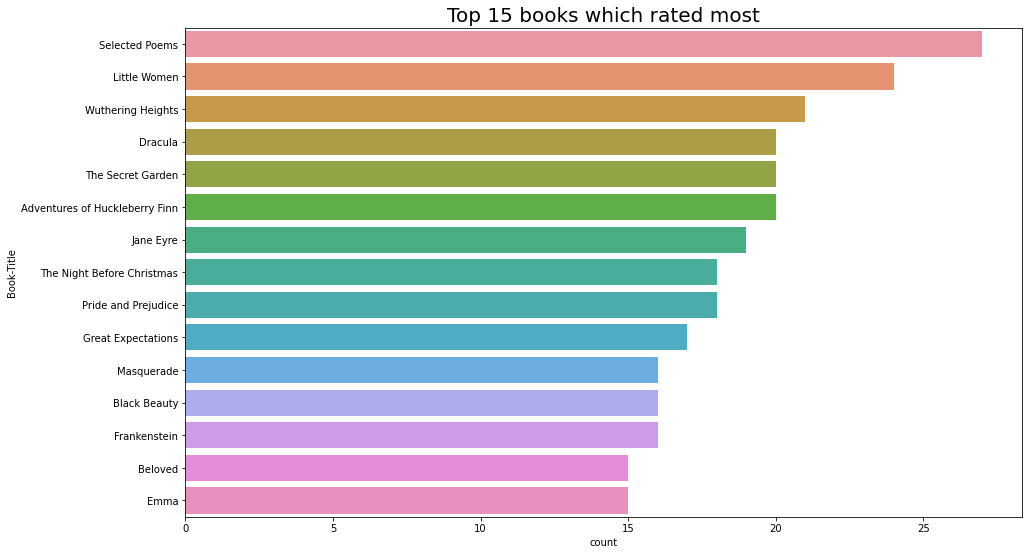

In [74]:
plt.figure(figsize=(15,9))
sns.countplot(y="Book-Title", data=books,order=books['Book-Title'].value_counts().index[0:15])
plt.title("Top 15 books which rated most",size=20)
plt.show()

##### Top 15 publishers who published most books

In [75]:
books["Publisher"].value_counts().head(15)

Harlequin                   7532
Silhouette                  4218
Pocket                      3900
Ballantine Books            3776
Bantam Books                3642
Scholastic                  3155
Simon &amp; Schuster        2969
Penguin Books               2840
Berkley Publishing Group    2764
Warner Books                2723
Penguin USA                 2714
Harpercollins               2525
Fawcett Books               2257
Signet Book                 2070
Random House Inc            2041
Name: Publisher, dtype: int64

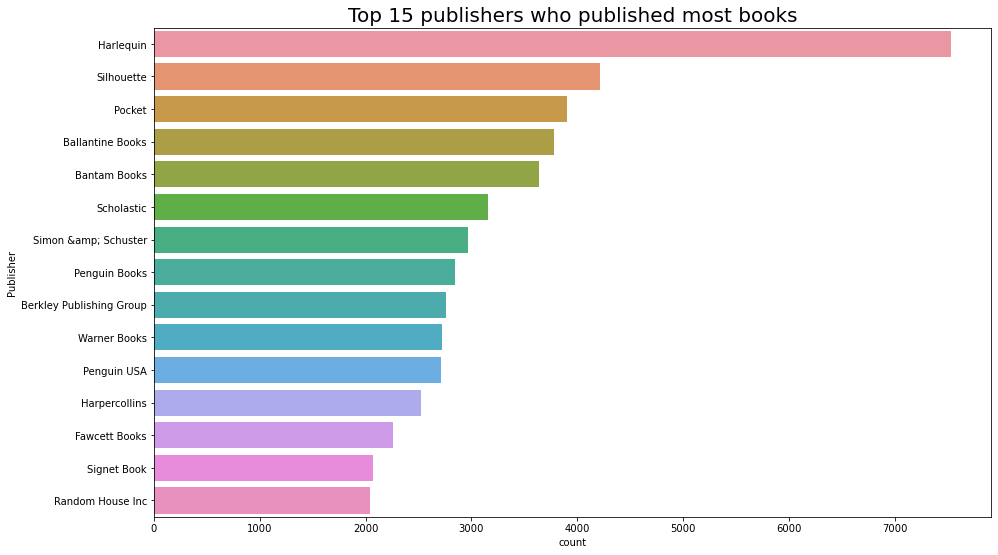

In [76]:
plt.figure(figsize=(15,9))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("Top 15 publishers who published most books",size=20)
plt.show()


**From above plot we can say that Harlequin is published most books.**

##### Top 10 authors whose books are published most

In [77]:
books["Book-Author"].value_counts().head(15)

Agatha Christie         631
William Shakespeare     567
Stephen King            523
Ann M. Martin           423
Francine Pascal         372
Carolyn Keene           372
Isaac Asimov            330
Nora Roberts            315
Barbara Cartland        307
Charles Dickens         302
Not Applicable (Na )    286
R. L. Stine             279
Mark Twain              231
Jane Austen             223
Terry Pratchett         220
Name: Book-Author, dtype: int64

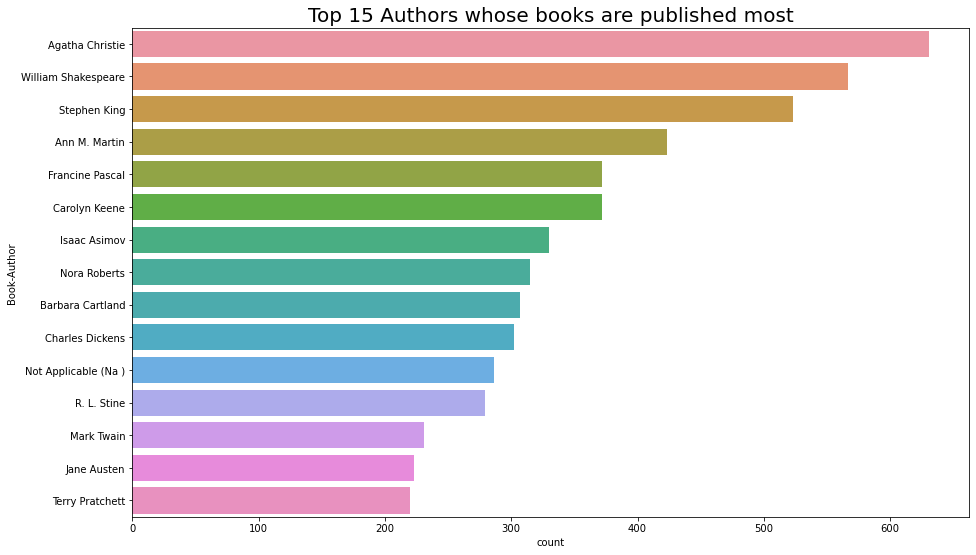

In [78]:
plt.figure(figsize=(15,9))
sns.countplot(y="Book-Author",data=books,order=books["Book-Author"].value_counts().index[0:15])
plt.title("Top 15 Authors whose books are published most",size=20)
plt.show()

In [79]:
import plotly.express as px

In [80]:
len(books["Year-Of-Publication"].unique())

109

In [81]:
books["Year-Of-Publication"].value_counts().head(10)

2002    22245
1999    17418
2001    17343
2000    17224
1998    15753
1997    14879
2003    14341
1996    14022
1995    13533
1994    11783
Name: Year-Of-Publication, dtype: int64

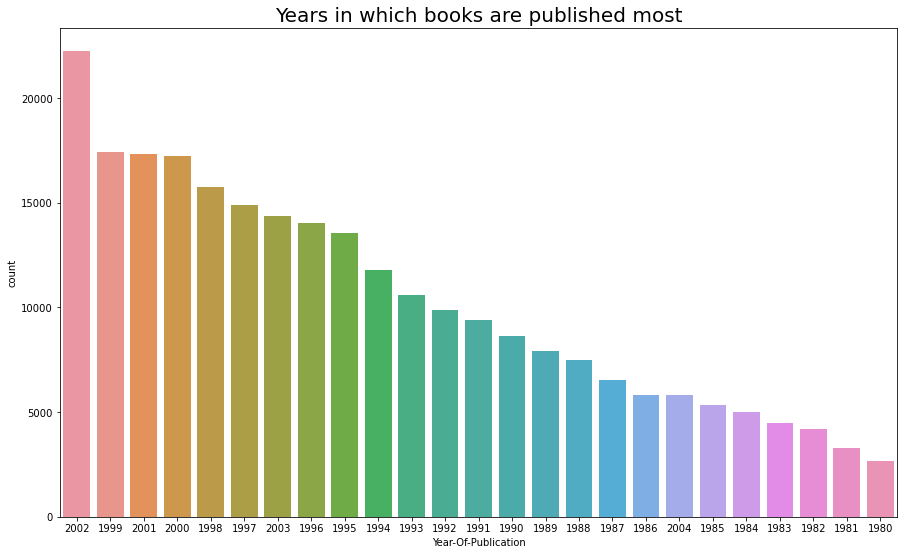

In [82]:
plt.figure(figsize=(15,9))
sns.countplot(x="Year-Of-Publication",data=books,order=books["Year-Of-Publication"].value_counts().index[0:25])
plt.title("Years in which books are published most",size=20)
plt.show()

In [83]:
dataset[dataset.City=="n/a"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
563,1841721522,New Vegetarian: Bold and Beautiful Recipes for Every Occasion,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.01.MZZZZZZZ.jpg,11676,10,35,n/a,n/a,n/a
564,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.01.MZZZZZZZ.jpg,11676,10,35,n/a,n/a,n/a
565,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.01.MZZZZZZZ.jpg,11676,5,35,n/a,n/a,n/a
566,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.01.MZZZZZZZ.jpg,11676,5,35,n/a,n/a,n/a
567,1853260053,Tess of the D'Urbervilles (Wordsworth Classics),Thomas Hardy,1997,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/1853260053.01.MZZZZZZZ.jpg,11676,0,35,n/a,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...
199678,078796400X,Meditations for Misfits: Finding Your Place in the Family of God,Marcia Ford,2003,Jossey-Bass,http://images.amazon.com/images/P/078796400X.01.MZZZZZZZ.jpg,167324,0,54,n/a,florida,usa
199679,097145762X,Restless Pilgrim: The Spiritual Journey of Bob Dylan,Scott Marshall,2002,Relevant Books,http://images.amazon.com/images/P/097145762X.01.MZZZZZZZ.jpg,167324,10,54,n/a,florida,usa
200323,9646635334,Persia - Older Than History,"H., Dr. Zendehdel",2002,Cps Inc,http://images.amazon.com/images/P/9646635334.01.MZZZZZZZ.jpg,218092,10,35,n/a,n/a,
201357,1550377426,Imagine You're a Fairy (Imagine This! Series),Meg Clibbon,2002,Annick Press,http://images.amazon.com/images/P/1550377426.01.MZZZZZZZ.jpg,243895,7,35,n/a,n/a,netherlands


In [84]:
dataset["City"]=dataset["City"].replace(["n/a"]," ")
dataset[dataset.City=="n/a"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country


In [85]:
dataset[dataset.State=="n/a"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country


In [86]:
dataset["State"]=dataset["State"].replace(["n/a"]," ")
dataset[dataset.State=="n/a"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country


In [87]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]


rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
059035342X,315
044023722X,282
067976402X,257
044021145X,210
043935806X,207


In [88]:
ratings_explicit

,User-ID,ISBN,Book-Rating
3,276729,052165615X,3
8,276744,038550120X,7
23,276747,1885408226,7
27,276751,3596218098,8
44,276762,3453092007,8
...,...,...,...
1149679,276688,038073107X,6
1149697,276688,044661193X,7
1149746,276688,1551669315,6
1149747,276688,1575660792,7


In [89]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [90]:
dataset[dataset.Country=="n/a"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country


### Implicite rating : 

In [91]:
implicite=dataset
implicite.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
3,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada


In [92]:
implicite["Book-Rating"].value_counts()

0     118864
8      19460
10     15586
7      14442
9      12513
5       9296
6       7085
4       1854
3       1282
2        608
1        396
Name: Book-Rating, dtype: int64

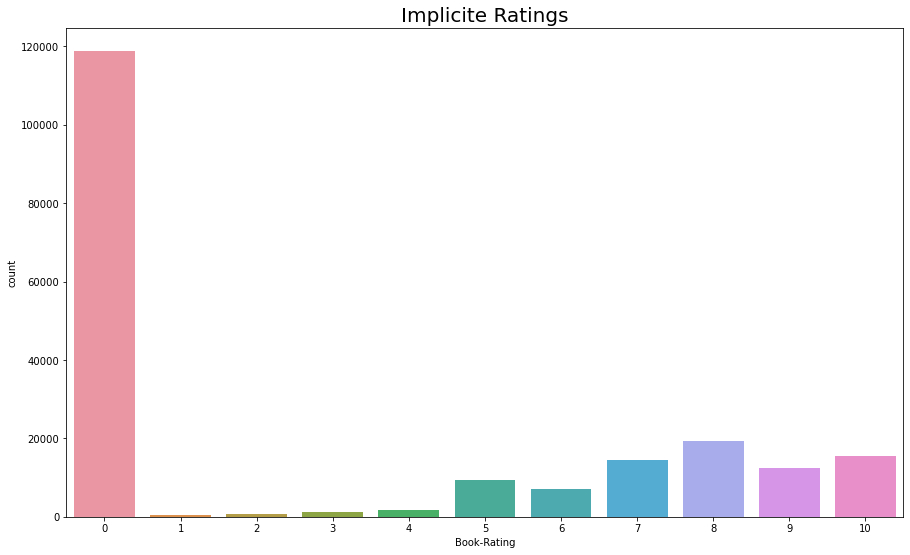

In [93]:
plt.figure(figsize=(15,9))
sns.countplot(x="Book-Rating",data=implicite)
plt.title("Implicite Ratings",size=20)
plt.show()

#### Most rated value of thses books is 0. There are more number of peaple who gave 0 rate or not rated.

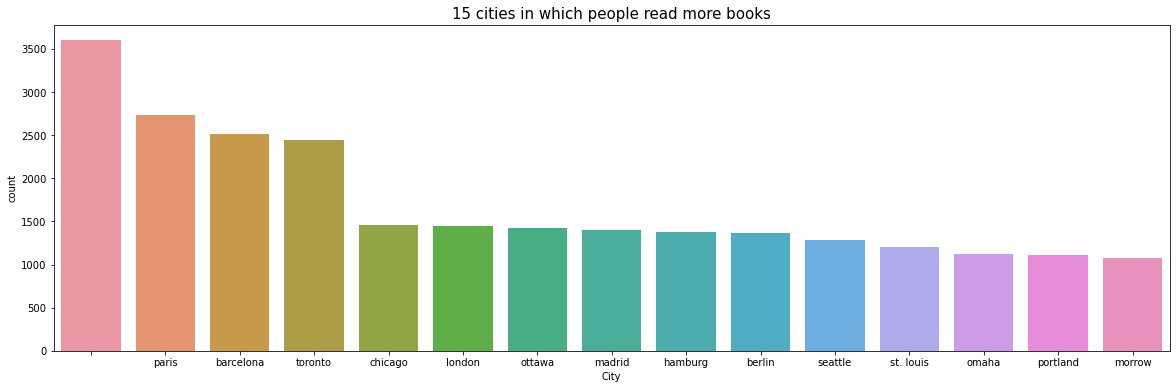

In [94]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=dataset,order=dataset['City'].value_counts().index[0:15])
plt.title("15 cities in which people read more books",size=15)
plt.show()

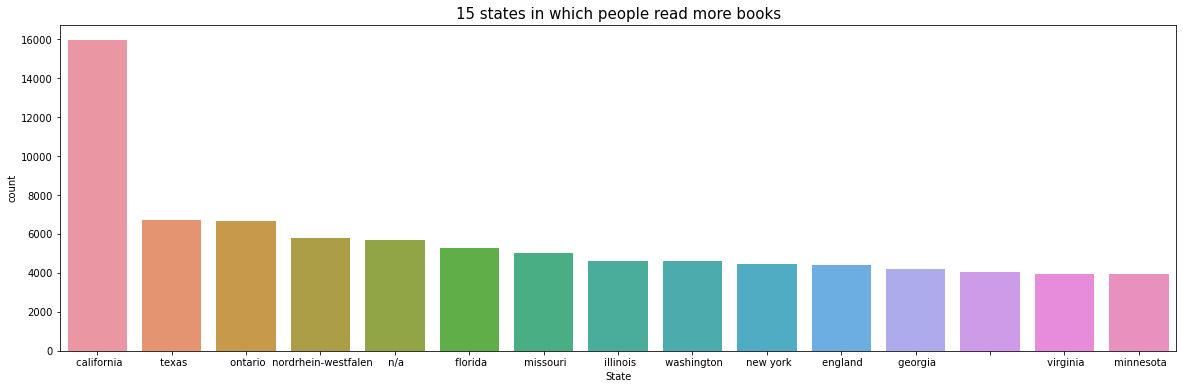

In [95]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=dataset,order=dataset['State'].value_counts().index[0:15])
plt.title("15 states in which people read more books",size=15)
plt.show()

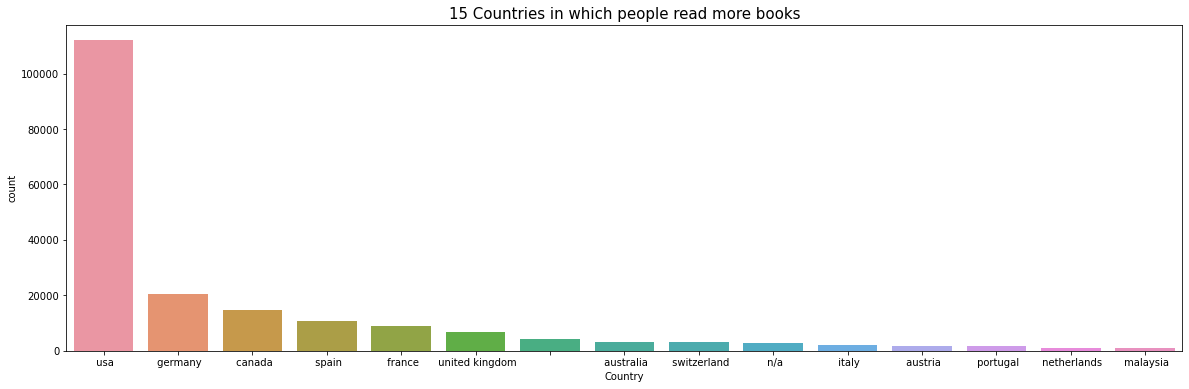

In [96]:
plt.figure(figsize=(20,6))
sns.countplot(x="Country", data=dataset,order=dataset['Country'].value_counts().index[0:15])
plt.title("15 Countries in which people read more books",size=15)
plt.show()

### Explicite rating :

In [97]:
explicite=dataset[dataset["Book-Rating"]>0]
explicite.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
5,1575663937,More Cunning Than Man: A Social History of Rats and Man,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
6,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg,8,7,35,timmins,ontario,canada


In [98]:
explicite["Book-Rating"].value_counts()

8     19460
10    15586
7     14442
9     12513
5      9296
6      7085
4      1854
3      1282
2       608
1       396
Name: Book-Rating, dtype: int64

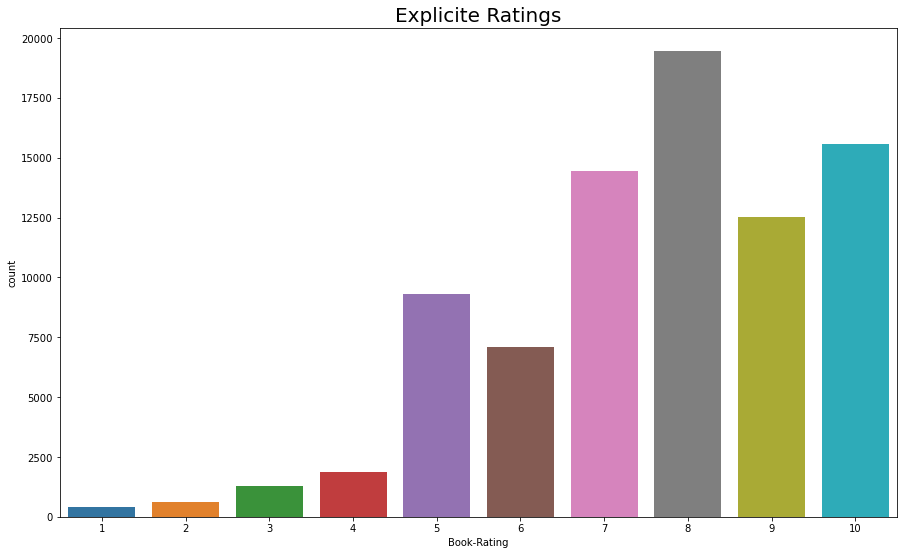

In [99]:
plt.figure(figsize=(15,9))
sns.countplot(x="Book-Rating",data=explicite)
plt.title("Explicite Ratings",size=20)
plt.show()

**There are many people who rated 8.**

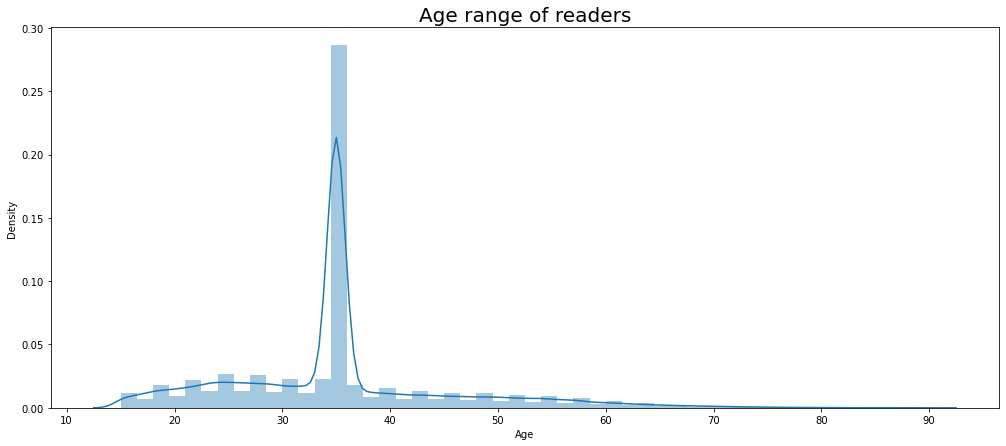

In [100]:
plt.figure(figsize=(17,7))
sns.distplot(users.Age)
plt.title("Age range of readers",size=20)
plt.show()

**Here we can say that there are many readers who read books between the age 30 to 40 years.**

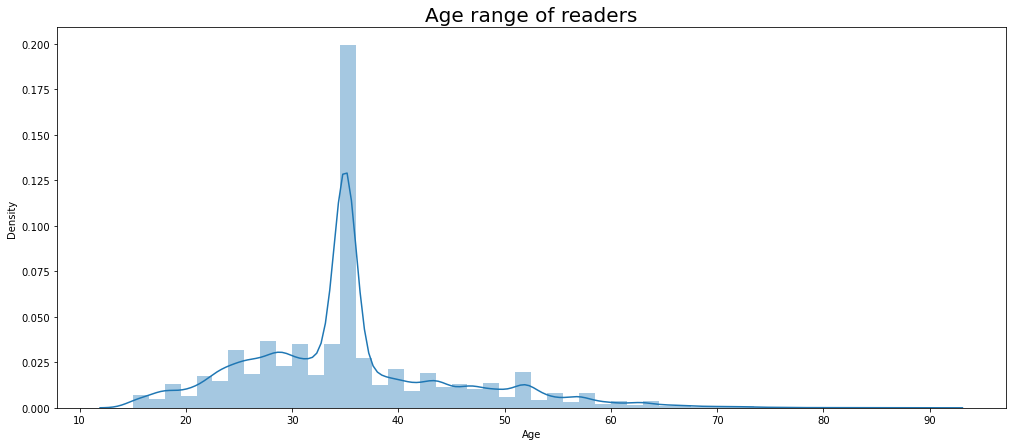

In [101]:
plt.figure(figsize=(17,7))
sns.distplot(explicite.Age)
plt.title("Age range of readers",size=20)
plt.show()

**Here is the range of age group (30-40 years) of people who rated the books.(1 to 10).**

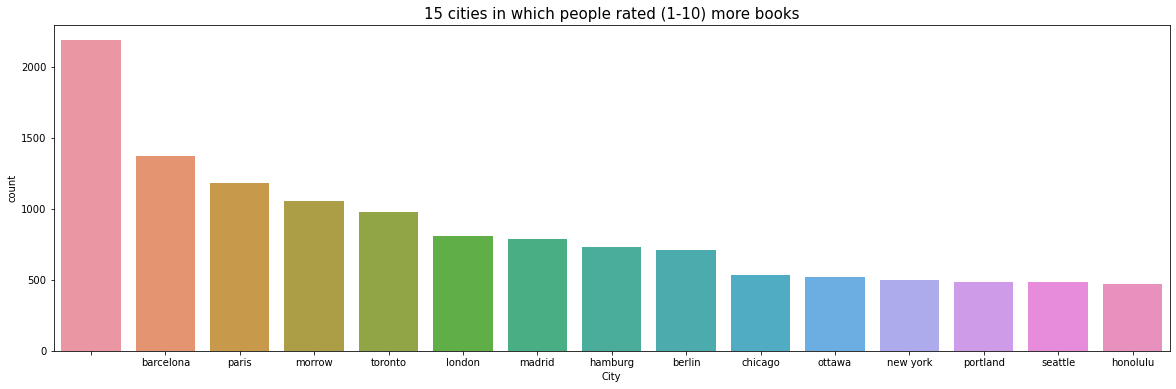

In [102]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=explicite,order=explicite['City'].value_counts().index[0:15])
plt.title("15 cities in which people rated (1-10) more books",size=15)
plt.show()

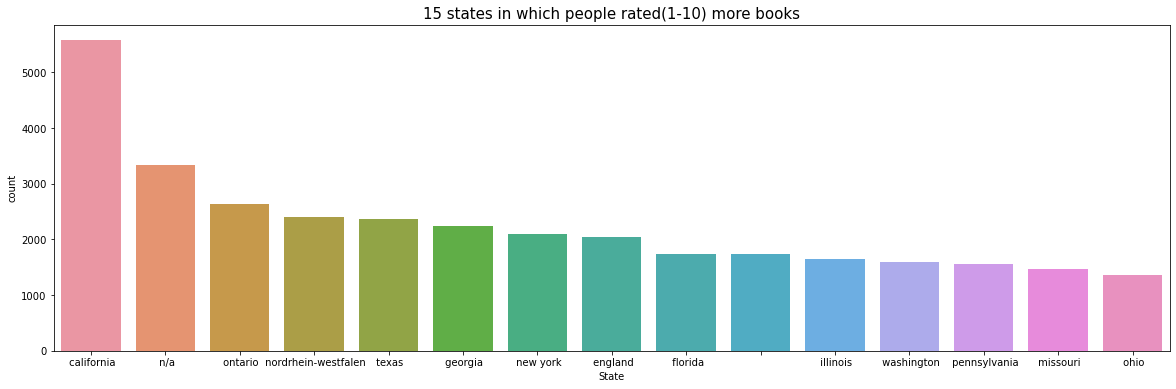

In [103]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=explicite,order=explicite['State'].value_counts().index[0:15])
plt.title("15 states in which people rated(1-10) more books",size=15)
plt.show()

In [104]:
#xyz=explicite.groupby(['Country', 'Book-Rating'])
#xyz.first()

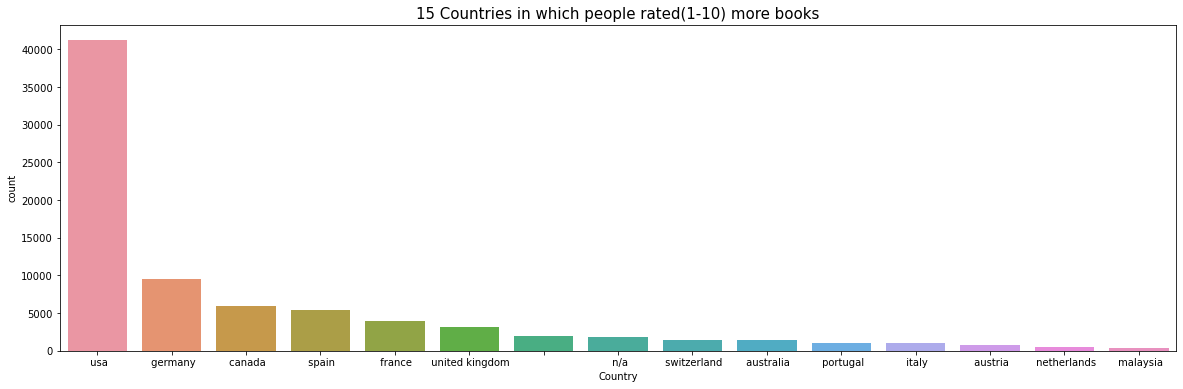

In [105]:
plt.figure(figsize=(20,6))
sns.countplot(x="Country", data=explicite,order=explicite['Country'].value_counts().index[0:15])
plt.title("15 Countries in which people rated(1-10) more books",size=15)
plt.show()

# Model Building

## * METHOD : Collaborative Fitering Based Recommender System

In [106]:
print("Shape of final dataset is : ",dataset.shape)
dataset.head(10)

Shape of final dataset is :  (201386, 12)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
3,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
5,1575663937,More Cunning Than Man: A Social History of Rats and Man,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
6,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg,8,7,35,timmins,ontario,canada
7,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
8,155874262X,Chicken Soup for the Soul (Chicken Soup for the Soul),Jack Canfield,1993,Health Communications,http://images.amazon.com/images/P/155874262X.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
9,1558744150,Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper)),Jack Canfield,1996,Health Communications,http://images.amazon.com/images/P/1558744150.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa


In [107]:
dataset["User-ID"].value_counts().sum()

201386

In [108]:
dataset["Book-Rating"].value_counts()

0     118864
8      19460
10     15586
7      14442
9      12513
5       9296
6       7085
4       1854
3       1282
2        608
1        396
Name: Book-Rating, dtype: int64

In [109]:
dataset["Book-Rating"].value_counts().iloc[1:].sum()  #There are total 82,522 people who rated something .

82522

In [110]:
step1=dataset.groupby("User-ID").count()["Book-Rating"]  #These are the people (users id wise) who rated somthing and how many times they rated.
step1

User-ID
8          7
10         1
12         1
22         4
32         2
          ..
278838     3
278843    13
278844     1
278851     6
278854     1
Name: Book-Rating, Length: 38511, dtype: int64

we have taken only those people who rated greater than 5 times

In [111]:
step2=step1>5
people_rate_greater_than5=step2[step2].index
print("\n People who rated greater than 5 books :",len(people_rate_greater_than5))
print("-"*50)
people_rate_greater_than5


 People who rated greater than 5 books : 5454
--------------------------------------------------


Int64Index([     8,    183,    242,    243,    254,    383,    392,    505,
               507,    625,
            ...
            278188, 278221, 278356, 278418, 278563, 278582, 278633, 278637,
            278843, 278851],
           dtype='int64', name='User-ID', length=5454)

Filtering those rows based on user id who rated greater than 5 times

In [112]:
filtered_ratings=dataset[dataset["User-ID"].isin(people_rate_greater_than5)]

In [113]:
filtered_ratings.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
1,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
3,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
5,1575663937,More Cunning Than Man: A Social History of Rats and Man,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg,8,6,35,timmins,ontario,canada
6,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg,8,7,35,timmins,ontario,canada
7,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
8,155874262X,Chicken Soup for the Soul (Chicken Soup for the Soul),Jack Canfield,1993,Health Communications,http://images.amazon.com/images/P/155874262X.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
9,1558744150,Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper)),Jack Canfield,1996,Health Communications,http://images.amazon.com/images/P/1558744150.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa


In [114]:
filtered_ratings.shape

(148809, 12)

In [115]:
dataset.shape

(201386, 12)

In [116]:
len(filtered_ratings["Book-Title"].unique())

57709

In [117]:
len(filtered_ratings["User-ID"].unique())

5454

Here count of users is lower than that of count of book-title. so we will have to go with user based filtering method.

We have filterd that users who rated minimum 5 times . now using this dataset we are going to find that books which been rated greater than 5 times.

In [118]:
step3=filtered_ratings.groupby("Book-Title").count()["Book-Rating"]>3

In [119]:
step3[step3]

Book-Title
 Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth    True
 Final Fantasy Anthology: Official Strategy Guide (Brady Games)                                     True
 Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)                                   True
 Q-Zone (Star Trek The Next Generation, Book 48)                                                    True
#NAME?                                                                                              True
                                                                                                    ... 
together by christmas                                                                               True
why I'm like this : True Stories                                                                    True
Ã?ngeles fugaces (Falling Angels)                                                                   True
Ã?Â?ber die Pflicht zum Ungehorsam gegen den

In [120]:
Top_rated_books=step3[step3].index
Top_rated_books

Index([' Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth',
       ' Final Fantasy Anthology: Official Strategy Guide (Brady Games)',
       ' Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)',
       ' Q-Zone (Star Trek The Next Generation, Book 48)', '#NAME?',
       '.Hack: //Legend of the Twilight, Vol. 1',
       '.Hack: //Legend of the Twilight, Vol. 2', '09-Nov',
       '10,000 dreams interpreted: A dictionary of dreams',
       '100 Selected Stories (Wordsworth Classics)',
       ...
       '\Cher Ã©cran-- \": Journal personnel, ordinateur, Internet (La couleur de la vie)"',
       'de Amor y de Sombra - Bolsillo',
       'good girls do: Sex Chronicles of a Shameless Generation',
       'iI Paradiso Degli Orchi', 'liegen lernen. Roman zum Film.',
       'together by christmas', 'why I'm like this : True Stories',
       'Ã?ngeles fugaces (Falling Angels)',
       'Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.'

In [121]:
final_ratings=filtered_ratings[filtered_ratings["Book-Title"].isin(Top_rated_books)]

In [122]:
final_ratings.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
2,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,8,5,35,timmins,ontario,canada
3,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,8,0,35,timmins,ontario,canada
7,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
8,155874262X,Chicken Soup for the Soul (Chicken Soup for the Soul),Jack Canfield,1993,Health Communications,http://images.amazon.com/images/P/155874262X.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
9,1558744150,Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper)),Jack Canfield,1996,Health Communications,http://images.amazon.com/images/P/1558744150.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
10,042517736X,Abduction,Robin Cook,2000,Berkley Publishing Group,http://images.amazon.com/images/P/042517736X.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
11,1576737357,Diary of a Teenage Girl - Becoming Me : Diary Number 1 (Diary of a Teenage Girl),Melody Carlson,2000,Multnomah,http://images.amazon.com/images/P/1576737357.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
12,1573229385,The Frog King: A Love Story,Adam Davies,2002,Riverhead Books,http://images.amazon.com/images/P/1573229385.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
13,037570504X,"Breath, Eyes, Memory",Edwidge Danticat,1998,Vintage Books USA,http://images.amazon.com/images/P/037570504X.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa
14,1558744606,Chicken Soup for the Mother's Soul (Chicken Soup for the Soul Series (Paper)),Jack Canfield,1997,Health Communications,http://images.amazon.com/images/P/1558744606.01.MZZZZZZZ.jpg,3363,0,29,knoxville,tennessee,usa


In [123]:
Pivot_table=final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [124]:
Pivot_table.fillna(0,inplace=True)

In [125]:
Pivot_table

User-ID,8,183,242,243,254,383,392,505,507,625,...,278188,278221,278356,278418,278563,278582,278633,278637,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Zone (Star Trek The Next Generation, Book 48)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#NAME?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
together by christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
why I'm like this : True Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ã?ngeles fugaces (Falling Angels),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
from sklearn.metrics.pairwise import cosine_similarity

In [127]:
similarity_score=cosine_similarity(Pivot_table)
similarity_score

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [128]:
similarity_score.shape

(7551, 7551)

In [129]:
#np.where(Pivot_table.index=="16 Lighthouse Road")[0][0]

In [130]:
#sorted(list(enumerate(similarity_score[2000])),key=lambda x:x[1],reverse=True)[1:6]

In [131]:
#Pivot_table.index[2]

In [132]:
def recommender(book_name):
  index=np.where(Pivot_table.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:10]

  for i in similar_items:
    print(Pivot_table.index[i[0]])

In [133]:
#Pivot_table.sum(axis=1).sort_values(ascending=False).head()

In [134]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')
Final_Dataset

,User-ID,Age,City,State,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,8,35,timmins,ontario,canada,074322678X,5,5.0,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg
1,8,35,timmins,ontario,canada,1552041778,5,5.0,1,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg
2,8,35,timmins,ontario,canada,1567407781,6,6.0,1,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg
3,8,35,timmins,ontario,canada,1575663937,6,6.0,1,More Cunning Than Man: A Social History of Rats and Man,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg
4,8,35,timmins,ontario,canada,1881320189,7,7.0,2,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82517,278668,48,madrid,madrid,spain,8408044079,5,5.0,1,LA Muerte Del Decano,Gonzalo Torrrente Ballester,2002,Planeta Publishing Corporation,http://images.amazon.com/images/P/8408044079.01.MZZZZZZZ.jpg
82518,278668,48,madrid,madrid,spain,8423322912,5,5.0,1,La Perla del Oriente (ColecciÃ³n Ancora y delfÃ­n),Jorge Ordaz,1993,Ediciones Destino,http://images.amazon.com/images/P/8423322912.01.MZZZZZZZ.jpg
82519,278721,44,kamen,nordrhein-westfalen,germany,3596109744,5,5.0,1,Haus der Erinnerungen. Roman.,Barbara Wood,1993,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596109744.01.MZZZZZZZ.jpg
82520,278851,33,dallas,texas,usa,067161746X,7,7.0,1,The Bachelor Home Companion: A Practical Guide to Keeping House Like a Pig,P.J. O'Rourke,1987,Pocket Books,http://images.amazon.com/images/P/067161746X.01.MZZZZZZZ.jpg


In [135]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)
ratings_explicit

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
3,276729,052165615X,3,3.000000,1
8,276744,038550120X,7,7.580247,81
23,276747,1885408226,7,7.000000,1
27,276751,3596218098,8,8.000000,1
44,276762,3453092007,8,8.000000,3
...,...,...,...,...,...
1149679,276688,038073107X,6,6.500000,2
1149697,276688,044661193X,7,7.512821,39
1149746,276688,1551669315,6,7.200000,5
1149747,276688,1575660792,7,7.000000,1


Collaborative Filtering based Recommendation System--(User-Item based)

In [136]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 26855
# of users with at least 5 interactions: 30


In [137]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 80804
# of interactions from users with at least 5 interactions: 6990


In [138]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,8890,202005924X,8,8.0,1
1,8890,2020062143,7,7.0,1
2,8890,2020067447,9,9.0,1
3,8890,2020068079,8,8.0,1
4,8890,2020088959,8,8.0,1
5,8890,2020094851,8,8.5,2
6,8890,202009908X,7,7.0,1
7,8890,2020099136,9,9.0,1
8,8890,2020126540,10,10.0,1
9,8890,2020281341,8,8.0,1


In [139]:
import math

In [140]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 6990


,ISBN,User-ID,Book-Rating
0,000104687X,23902,2.807355
1,000225056X,101851,3.459432
2,000225929X,11676,3.459432
3,000433549X,248718,3.321928
4,000611962X,23902,3.000000


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 5592
# interactions on Test set: 1398


In [143]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,000104687X,000225056X,000225929X,000611962X,000649840X,000710331X,000710698X,002026478X,002028361X,002036041X,...,987960170X,9974643058,999058284X,9992003766,9997406990,9997411757,9997507002,999750805X,9997519086,9997555635
User-ID,,,,,,,,,,,,,,,,,,,,,
8890,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
11676,0.000000,0.0,3.459432,0.0,3.169925,0.0,0.0,0.0,0.0,0.0,...,2.584963,3.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
16795,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
23902,2.807355,0.0,0.000000,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,2.584963,3.0,3.0,0.0,2.807355,2.584963,3.169925
33145,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [144]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.45943162, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [145]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[8890, 11676, 16795, 23902, 33145, 35433, 35859, 39467, 49144, 56399]

In [146]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [147]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [148]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendatio

In [149]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.37164143e-04,  1.72398465e-04, -3.34036974e-04, ...,
         1.37164143e-04,  1.26298304e-04,  1.54878901e-04],
       [-4.77384303e-04, -6.64329603e-04,  3.45909841e+00, ...,
        -4.77384303e-04, -4.39566979e-04, -5.39038518e-04],
       [-1.76115318e-02, -4.46598028e-02, -6.37910340e-03, ...,
        -1.76115318e-02, -1.62163854e-02, -1.98860623e-02],
       ...,
       [ 1.68774230e-03, -4.11651896e-03, -9.78739162e-04, ...,
         1.68774230e-03,  1.55404310e-03,  1.90571433e-03],
       [ 2.74479650e-02, -5.51832715e-03,  4.14837477e-03, ...,
         2.74479650e-02,  2.52735982e-02,  3.09928716e-02],
       [-7.88695826e-03, -5.76656990e-03,  3.79477109e-03, ...,
        -7.88695826e-03, -7.26217095e-03, -8.90555946e-03]])

In [150]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,8890,11676,16795,23902,33145,35433,35859,39467,49144,56399,...,171118,172888,177458,189835,197659,217740,235105,241198,248718,261105
ISBN,,,,,,,,,,,,,,,,,,,,,
000104687X,0.000137,-0.000477,-0.017612,2.805298,-0.000654,0.000321,0.020092,0.016759,-0.000320,-0.000373,...,0.016795,-0.000123,-0.001391,0.000137,0.000232,0.038375,-0.000432,0.001688,0.027448,-0.007887
000225056X,0.000172,-0.000664,-0.044660,-0.001817,-0.000656,0.000492,0.048552,-0.002926,-0.000505,-0.003193,...,0.001114,-0.000142,0.179445,0.000550,0.001049,0.042846,0.000779,-0.004117,-0.005518,-0.005767
000225929X,-0.000334,3.459098,-0.006379,-0.000588,0.007682,-0.000055,0.001050,0.005411,-0.000251,-0.000135,...,0.019453,0.002571,0.003079,0.000027,0.000096,0.002509,-0.000121,-0.000979,0.004148,0.003795
000611962X,0.000147,-0.000510,-0.018820,2.997801,-0.000699,0.000343,0.021471,0.017909,-0.000342,-0.000399,...,0.017948,-0.000131,-0.001487,0.000146,0.000247,0.041009,-0.000461,0.001804,0.029331,-0.008428
000649840X,-0.000306,3.169620,-0.005845,-0.000539,0.007039,-0.000050,0.000963,0.004958,-0.000230,-0.000123,...,0.017825,0.002356,0.002821,0.000024,0.000088,0.002299,-0.000111,-0.000897,0.003801,0.003477


In [151]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg


In [152]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [153]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [154]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [167]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(5))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [168]:
interactions_full_indexed_df

,ISBN,Book-Rating
User-ID,,
23902,000104687X,2.807355
101851,000225056X,3.459432
11676,000225929X,3.459432
248718,000433549X,3.321928
23902,000611962X,3.000000
...,...,...
189835,9997507002,2.584963
23902,999750805X,2.807355
23902,9997519086,2.584963


Let's recommend books to User-Id 69078 and see the results.

In [169]:
print(list(interactions_full_indexed_df.index.values))

[23902, 101851, 11676, 248718, 23902, 11676, 11676, 56399, 56399, 56399, 248718, 101851, 56399, 197659, 11676, 76499, 16795, 11676, 189835, 69078, 69078, 93047, 16795, 189835, 98391, 16795, 98391, 11676, 98391, 235105, 11676, 98391, 235105, 11676, 98391, 153662, 98391, 11676, 16795, 98391, 98391, 98391, 98391, 98391, 11676, 11676, 16795, 11676, 153662, 16795, 197659, 235105, 98391, 11676, 11676, 235105, 11676, 69078, 69078, 98391, 98391, 235105, 197659, 153662, 189835, 189835, 197659, 248718, 98391, 98391, 69078, 93047, 98391, 11676, 171118, 98391, 98391, 11676, 98391, 93047, 98391, 98391, 69078, 69078, 76499, 248718, 153662, 248718, 11676, 11676, 11676, 23902, 11676, 11676, 235105, 11676, 11676, 11676, 235105, 235105, 171118, 11676, 93047, 153662, 153662, 11676, 93047, 35859, 11676, 248718, 11676, 171118, 98391, 197659, 11676, 171118, 56399, 153662, 153662, 248718, 11676, 153662, 153662, 153662, 235105, 87141, 16795, 11676, 11676, 153662, 11676, 56399, 11676, 16795, 11676, 248718, 764

In [170]:
len(interactions_full_indexed_df)

6990

In [172]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  11676
Recommendation for User-ID =  11676
         ISBN                                        Book-Title  recStrength
0  1565920015    Unix in a Nutshell: System V &amp; Solaris 2.0     0.026343
1  1570620636  Zen Flesh, Zen Bones (Shambhala Pocket Classics)     0.025796
2  156402976X                                            Catkin     0.022378
3  087923816X           A Warning to the Curious: Ghost Stories     0.020225
4  096139210X    The Visual Display of Quantitative Information     0.019453


In [173]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  189835
Recommendation for User-ID =  189835
         ISBN                                                Book-Title  \
0  044022165X                                             The Rainmaker   
1  044022165X                                             The Rainmaker   
2  1853260150              Picture of Dorian Gray (Wordsworth Classics)   
3  8433920863                                 Relatos de Los Inesperado   
4  9681908112  Genoma - La Autobiografia de Una Especie En 23 Capitulos   

   recStrength  
0     0.029179  
1     0.029179  
2     0.029000  
3     0.028977  
4     0.028977  


In [174]:
interactions_full_indexed_df

,ISBN,Book-Rating
User-ID,,
23902,000104687X,2.807355
101851,000225056X,3.459432
11676,000225929X,3.459432
248718,000433549X,3.321928
23902,000611962X,3.000000
...,...,...
189835,9997507002,2.584963
23902,999750805X,2.807355
23902,9997519086,2.584963


In [175]:
df1=interactions_full_indexed_df.reset_index()
df1

,User-ID,ISBN,Book-Rating
0,23902,000104687X,2.807355
1,101851,000225056X,3.459432
2,11676,000225929X,3.459432
3,248718,000433549X,3.321928
4,23902,000611962X,3.000000
...,...,...,...
6985,189835,9997507002,2.584963
6986,23902,999750805X,2.807355
6987,23902,9997519086,2.584963
6988,23902,9997555635,3.169925


In [176]:
interactions_full_indexed_df

,ISBN,Book-Rating
User-ID,,
23902,000104687X,2.807355
101851,000225056X,3.459432
11676,000225929X,3.459432
248718,000433549X,3.321928
23902,000611962X,3.000000
...,...,...
189835,9997507002,2.584963
23902,999750805X,2.807355
23902,9997519086,2.584963


In [177]:
Final_Dataset

,User-ID,Age,City,State,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,8,35,timmins,ontario,canada,074322678X,5,5.0,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg
1,8,35,timmins,ontario,canada,1552041778,5,5.0,1,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg
2,8,35,timmins,ontario,canada,1567407781,6,6.0,1,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg
3,8,35,timmins,ontario,canada,1575663937,6,6.0,1,More Cunning Than Man: A Social History of Rats and Man,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg
4,8,35,timmins,ontario,canada,1881320189,7,7.0,2,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82517,278668,48,madrid,madrid,spain,8408044079,5,5.0,1,LA Muerte Del Decano,Gonzalo Torrrente Ballester,2002,Planeta Publishing Corporation,http://images.amazon.com/images/P/8408044079.01.MZZZZZZZ.jpg
82518,278668,48,madrid,madrid,spain,8423322912,5,5.0,1,La Perla del Oriente (ColecciÃ³n Ancora y delfÃ­n),Jorge Ordaz,1993,Ediciones Destino,http://images.amazon.com/images/P/8423322912.01.MZZZZZZZ.jpg
82519,278721,44,kamen,nordrhein-westfalen,germany,3596109744,5,5.0,1,Haus der Erinnerungen. Roman.,Barbara Wood,1993,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596109744.01.MZZZZZZZ.jpg
82520,278851,33,dallas,texas,usa,067161746X,7,7.0,1,The Bachelor Home Companion: A Practical Guide to Keeping House Like a Pig,P.J. O'Rourke,1987,Pocket Books,http://images.amazon.com/images/P/067161746X.01.MZZZZZZZ.jpg


In [178]:
Final_Dataset.iloc[11676,13]

'http://images.amazon.com/images/P/1551668637.01.MZZZZZZZ.jpg'

In [181]:
user=int(input("Enter User ID from above list for book recommendation  "))
output=model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  189835
Recommendation for User-ID =  189835
         ISBN                                                Book-Title  \
0  044022165X                                             The Rainmaker   
1  044022165X                                             The Rainmaker   
2  1853260150              Picture of Dorian Gray (Wordsworth Classics)   
3  8433920863                                 Relatos de Los Inesperado   
4  9681908112  Genoma - La Autobiografia de Una Especie En 23 Capitulos   

   recStrength  
0     0.029179  
1     0.029179  
2     0.029000  
3     0.028977  
4     0.028977  
